# DataScientists - Producto 3

###Instalación:

Primero de todo instalamos el geopandas utilizando el comando:

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 49.4 MB/s 
     |████████████████████████████████| 6.3 MB 39.5 MB/s 


## 2. Importamos los modulos necesarios

Ahora vamos a importar las librerías que vamos a usar, importaremos “pandas” como “pd” y geopandas como “gpd”

In [2]:
import pandas as pd
import geopandas as gpd
import dateutil
from shapely.geometry import shape,Point,Polygon,mapping,LineString

#### b) Subiremos el archivo  csv descargado
Generaremos un fichero excel a partir del csv


In [3]:
read_file = pd.read_csv ("2017_accidents_gu_bcn.csv")
read_file.to_excel ("2017_accidents_gu_bcn.xlsx", index = None, header=True)

#### c) Leemos el fichero de excel
( excel_file es el path+nombre y lo volcamos en una variable),
luego leemos el contenido del fichero volcandolo en otra variable



In [4]:
excel_file = '2017_accidents_gu_bcn.xlsx'
accidents_BCN = pd.read_excel(excel_file)


#### d) Mostramos el fichero configurando que muestre las columnas activas

In [5]:
pd.options.display.max_columns= None
accidents_BCN

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2017S008429,-1,Desconegut,-1,Desconegut,-1,Número 27 ...,Desconegut,Divendres,Dv,Laboral,2017,10,Octubre,13,8,Matí,Altres,0,2,0,2,2,426936.65,4577079.15,2.125624,41.340045
1,2017S007316,-1,Desconegut,-1,Desconegut,-1,Número 3 Zona Franca / Número 50 Zona Franca ...,Desconegut,Divendres,Dv,Laboral,2017,9,Setembre,1,13,Matí,No és causa del vianant,0,2,0,2,2,426503.22,4577014.83,2.120452,41.339426
2,2017S010210,-1,Desconegut,-1,Desconegut,-1,Litoral (Besòs) ...,K128,Divendres,Dv,Laboral,2017,12,Desembre,8,21,Tarda,No és causa del vianant,0,5,0,5,2,430450.5,4579358.49,2.167356,41.360886
3,2017S006364,-1,Desconegut,-1,Desconegut,-1,Número 3 Zona Franca ...,77-111,Divendres,Dv,Laboral,2017,7,Juliol,21,2,Nit,No és causa del vianant,0,1,0,1,2,426842.33,4576816.19,2.124529,41.337668
4,2017S004615,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa ...,0323 0325,Dijous,Dj,Laboral,2017,5,Maig,25,14,Tarda,No és causa del vianant,0,1,0,1,3,"432006,95","4585503,52",2.185272,41.416365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,9,Sant Andreu,59,el Bon Pastor,701266,Litoral (Llobregat) ...,140000,Dimarts,Dm,Laboral,2017,4,Abril,25,8,Matí,No és causa del vianant,0,1,0,1,3,"433866,55","4588278,91",2.201800,41.392004
10335,2017S001896,9,Sant Andreu,59,el Bon Pastor,321004,PL MONTERREY ...,0015 0015,Dimecres,Dc,Laboral,2017,3,Març,8,12,Matí,No és causa del vianant,0,1,0,1,2,"433608,87","4587774,14",2.206013,41.443445
10336,2017S010718,9,Sant Andreu,59,el Bon Pastor,151957,Litoral (Llobregat) ...,0009 0009,Dijous,Dj,Laboral,2017,12,Desembre,28,8,Matí,No és causa del vianant,0,1,0,1,2,"433877,14","4588218,15",2.205607,41.443894
10337,2017S006145,9,Sant Andreu,59,el Bon Pastor,151957,Litoral (Besòs) ...,0039 0039,Divendres,Dv,Laboral,2017,7,Juliol,14,14,Tarda,No és causa del vianant,0,1,0,1,2,"433625,82","4588678,66",2.205118,41.444824


#### e) Representamos el numero de accidentes en un histograma

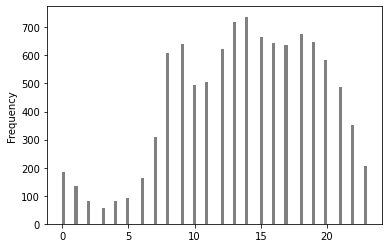

In [6]:
fig1=accidents_BCN['Hora_dia'].plot(kind='hist', bins=100, color=['gray'])

#### f) Listamos grafica y la contrastamos con los valores anteriores


In [7]:
contador = accidents_BCN['Hora_dia'].value_counts()
print(contador)

14    738
13    719
18    675
15    666
19    648
16    645
9     642
17    638
12    624
8     610
20    583
11    505
10    495
21    489
22    353
7     308
23    207
0     185
6     164
1     134
5      92
4      82
2      81
3      56
Name: Hora_dia, dtype: int64


Hallamos cual es la hora del año que tiene más accidentes por defecto nos lista los valores en orden ascendente. Lo que observamos es que es a la hora de comer (las 14h)

###Vemos el mes en que suceden más accidentes

In [8]:
contador = accidents_BCN['Nom_mes'].value_counts()
print(contador)


Novembre    991
Maig        963
Març        935
Octubre     928
Juliol      918
Juny        908
Abril       845
Gener       844
Febrer      824
Setembre    769
Desembre    762
Agost       652
Name: Nom_mes, dtype: int64


Vemos que es en el mes de noviembre donde sucenden más accidentes

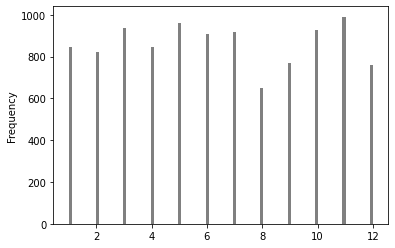

In [9]:
fig2=accidents_BCN['Mes_any'].plot(kind='hist', bins=100, color=['gray'])


#### g) Creamos una grafica tipo linea que muestre el nro de expedientes por cada mes agrupado por turno


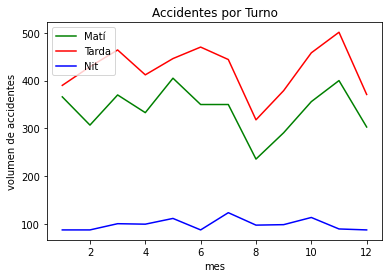

In [10]:
import matplotlib.pyplot as plt


a = accidents_BCN["Descripcio_torn"] =="Matí"
b = accidents_BCN["Descripcio_torn"] =="Tarda"
c = accidents_BCN["Descripcio_torn"] == "Nit"
fig, ax = plt.subplots()

x = accidents_BCN[a]['Mes_any'].value_counts().sort_index()
y = accidents_BCN[b]['Mes_any'].value_counts().sort_index()
z = accidents_BCN[c]['Mes_any'].value_counts().sort_index()

ax.plot(x, color = 'green', label = 'Matí',)
ax.plot(y, color = 'red', label = 'Tarda')
ax.plot(z, color = 'blue', label = 'Nit')
ax.legend(loc = 'upper left')
ax.set_title("Accidentes por Turno")
ax.set_ylabel("volumen de accidentes")
ax.set_xlabel("mes")
plt.show()


#### h) Visualizar el número de expedientes totales por mes


In [12]:
accidents_BCN.groupby('Mes_any')['Numero_expedient'].count()

Mes_any
1     844
2     824
3     935
4     845
5     963
6     908
7     918
8     652
9     769
10    928
11    991
12    762
Name: Numero_expedient, dtype: int64

Hacemos un histograma con esta información. A ojo podemos observar que el mes 11 (es decir, Noviembre) es donde hay más expedientes.

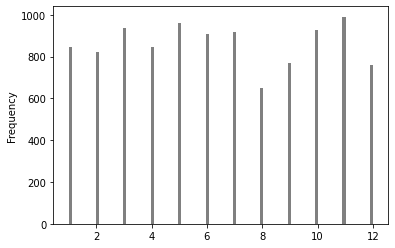

In [13]:
accidents_BCN['Mes_any'].plot(kind='hist', bins=100, color=['gray'])

Finalmente miramos teniendo en cuenta el mes y cuantos números de expendientes tiene cada uno para ver que tres meses tienen más.

In [17]:
accidents_BCN.groupby('Mes_any')['Numero_expedient'].count().sort_values()[-3:]

Mes_any
3     935
5     963
11    991
Name: Numero_expedient, dtype: int64

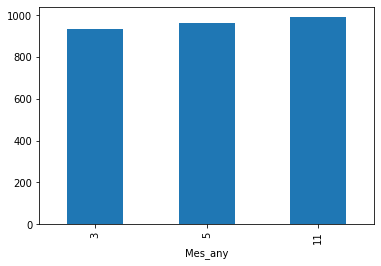

In [18]:
accidents_BCN.groupby('Mes_any')['Numero_expedient'].count().sort_values()[-3:].plot(kind='bar')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

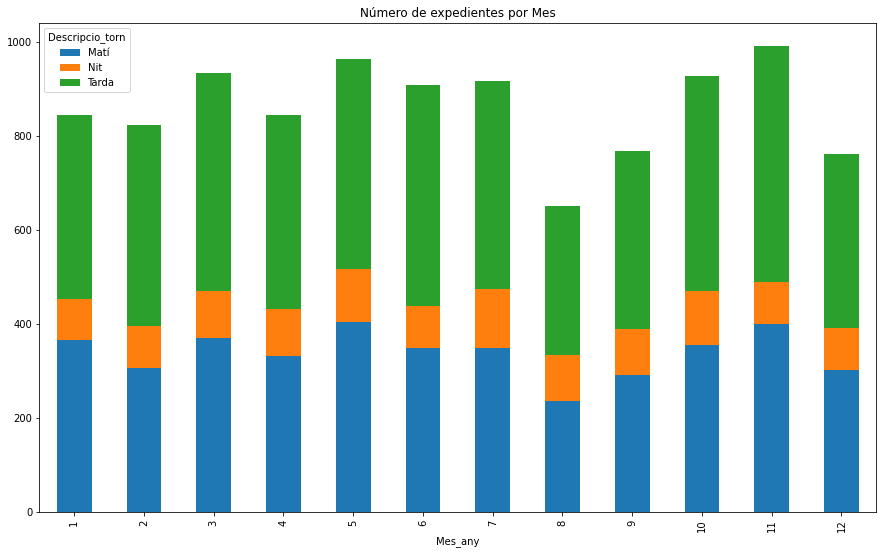

In [41]:
fig3, ax = plt.subplots(figsize=(15,9))
fig3 = accidents_BCN.groupby(['Mes_any','Descripcio_torn']).count()['Numero_expedient'].unstack().plot(ax = ax, kind='bar', stacked=True)
plt.title ("Número de expedientes por Mes")

plt